# HW - Decision Trees

### Please follow the instructions given during the class/demo

### Load sklearn's wine dataset and perform classification using Decision trees. Try different pruning techniques, criteria to split the tree which gives you best results. Plot the tree and comment on your findings. Also plot the feature importances of each tree.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [1]:
from sklearn.datasets import load_wine
from  sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
from sklearn import metrics 
import matplotlib.pyplot as plt

data = load_wine()
X = data.data
Y = data.target

#print(len(data.feature_names))
#print(data.target_names)
#print(X)
#print(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [2]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier(criterion="entropy",max_depth=2)
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


[Text(167.4, 271.8, 'X[6] <= 1.575\nentropy = 1.565\nsamples = 142\nvalue = [45, 58, 39]'),
 Text(83.7, 163.08, 'X[9] <= 3.825\nentropy = 0.811\nsamples = 52\nvalue = [0, 13, 39]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.169\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(251.10000000000002, 163.08, 'X[12] <= 755.0\nentropy = 1.0\nsamples = 90\nvalue = [45, 45, 0]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.156\nsamples = 44\nvalue = [1, 43, 0]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.258\nsamples = 46\nvalue = [44, 2, 0]')]

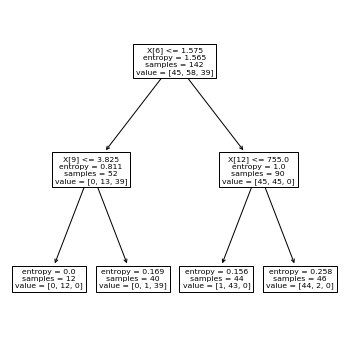

In [3]:
fig = plt.figure(figsize=(6,6))
tree.plot_tree(model)

In [4]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.45772282, 0.        , 0.        , 0.18013981,
       0.        , 0.        , 0.36213737])

<BarContainer object of 13 artists>

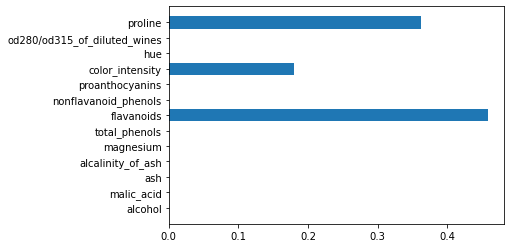

In [5]:
plt.barh(data.feature_names, model.feature_importances_)

In [6]:
model = DecisionTreeClassifier(criterion="gini",splitter="random", max_depth=3)
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


Accuracy: 0.8055555555555556


[Text(133.92000000000002, 181.2, 'X[6] <= 1.721\ngini = 0.657\nsamples = 142\nvalue = [45, 58, 39]'),
 Text(66.96000000000001, 108.72, 'gini = 0.461\nsamples = 61\nvalue = [0, 22, 39]'),
 Text(200.88000000000002, 108.72, 'X[12] <= 1042.669\ngini = 0.494\nsamples = 81\nvalue = [45, 36, 0]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.415\nsamples = 51\nvalue = [15, 36, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]')]

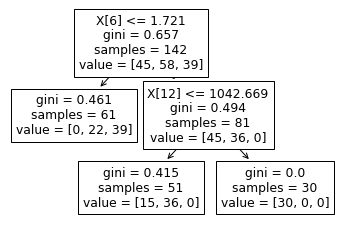

In [7]:
model = DecisionTreeClassifier(criterion="gini",splitter="random", max_depth=3,min_samples_leaf=26)
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
tree.plot_tree(model)

# HW - Random Forest



### Load sklearn's iris dataset and perform classification using Random Forest. Also plot the feature importances. Write down your comments.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [8]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

data = load_iris()
X = data.data
Y = data.target

#print(len(data.feature_names))
#print(Y)


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [9]:
model = RandomForestClassifier(criterion="entropy", n_estimators=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [10]:
model.feature_importances_

array([0.24715429, 0.01548588, 0.20709499, 0.53026484])

<BarContainer object of 4 artists>

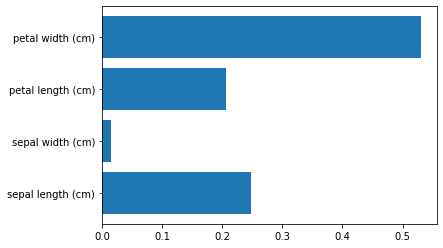

In [11]:
plt.barh(data.feature_names, model.feature_importances_)

We notice that petal length is most influencing the decision as it is most important feature followed by petal width
and when n_estimator is set to 1 Random forest and Decision tree have same accuracy, as we go on increasing n_estimators the accuracy increases

## Write four differences between Random Forests and Decision Trees ¶


Decision tree relies on a singular decision while Random Forest assembles randomized decisionsfrom decision trees in forest and makes the final decision based on the majority.

Decision trees are easy to build and fast while Random forests are more precise, requires moretime for building and training as they undergo rigorous training hence slow.

Decision tree is build on whole dataset while Random forest picks up random rows and features tobuild multiple decision trees and averages the outputs

Random forest reduces the variance part of error unlike decision tree which reduces the bias part.Random forest gives better accuracy on unexpected validation datasets while decision tree givesmore accuracy when test dataset is sure to be part of the training dataset or overlapping.